In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import numpy.random as rand
import numpy as np
import sys
import os


from bnn import BNNBayesbyBackprop, gauss_logpdf
os.getcwd()

'C:\\Users\\emers\\Documents\\Tufts_fall_19\\BDL\\finalProject\\BDL_final_project'

In [0]:
# Real dataset
#Emerson's Paths:
small_trained_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/smallTrainCleaned.csv"
y_label_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/y_labels.csv"
#small_trained_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/smallTrainCleaned.csv"
#y_label_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/y_labels.csv"
data = pd.read_csv(small_trained_path)
Y = pd.read_csv(y_label_path)

data['Y'] = Y
data['Y'][data['Y'] == -1] = 0
data = data.sample(frac=1).reset_index(drop=True)

print(Y)

In [0]:
batch_size = 100
n_iters = 3000

num_epochs = int(n_iters / (data.shape[0] / batch_size))

train_size = int(0.8 * len(data))
test_size = len(data) - train_size

train_dataset = data[:train_size]
test_dataset = data[train_size:]


train_y = train_dataset['Y']
train_dataset = train_dataset.drop('Y', axis=1)

test_y = test_dataset['Y']
test_dataset = test_dataset.drop('Y', axis=1)


train_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(train_dataset.values),
                      torch.tensor(train_y.values)),
                  batch_size=batch_size,
                  shuffle=True)



test_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(test_dataset.values),
                      torch.tensor(test_y.values)),
                  batch_size=batch_size,
                  shuffle=True)

NameError: ignored

In [0]:
# Toy dataset
X_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_x.csv"
y_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_y.csv"

X = np.loadtxt(X_path, delimiter=',', dtype=np.float64)[:1000]
y = np.loadtxt(y_path, delimiter=',', dtype=np.float64)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)


OSError: ignored

Toy dataset for regression

In [2]:
W = np.array([-10, 10]).reshape(-1, 1)
b = -5
X_train = np.random.uniform(-10,10, (5000, 2))
X_train[:,0] = 0.0
X_train.shape
W.T.shape

eps = 0.0001
W_s = np.array([0.0, 0.3]).reshape(-1, 1)
print(W_s)
b_s = 0.1

print(b_s)

y_train = np.zeros((X_train.shape[0], 1), dtype=float)
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  y_train[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))



print(y_train)

[[0. ]
 [0.3]]
0.1
[[ 17.68983611]
 [143.51937418]
 [-14.93037446]
 ...
 [-57.38296373]
 [ 20.99044157]
 [-47.52942559]]


(array([645., 679., 624., 659., 631., 631., 687., 330., 105.,   9.]),
 array([-104.94060775,  -79.51809883,  -54.09558991,  -28.67308099,
          -3.25057207,   22.17193684,   47.59444576,   73.01695468,
          98.4394636 ,  123.86197251,  149.28448143]),
 <a list of 10 Patch objects>)

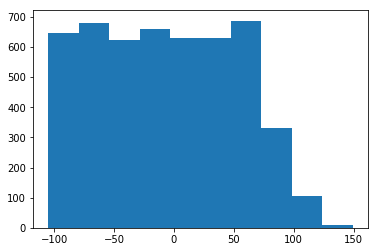

In [3]:
plt.hist(y_train)
# np.exp(10 * 0.01)

compare likelihood of test set given true mean and true variance and true variance + bias

In [4]:
tst = np.empty_like(X_train[:,0])
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  tst[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
tst

print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s)).sum())
print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s) + 100).sum())


-877440121416.7212
-31267592.02267666


[autoreload of bnn failed: Traceback (most recent call last):
  File "C:\Users\emers\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\emers\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 376, in superreload
    module = reload(module)
  File "C:\Users\emers\Anaconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\emers\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\emers\Documents\Tufts_fall_19\BDL\finalProject\BDL_fin

[0. 0. 1. ... 0. 0. 1.]
[[ 0.22723016 -5.17121065]
 [ 0.32293391 -4.13542332]
 [-0.72148121  5.66804809]
 ...
 [-0.88316059 -3.85343399]
 [-1.20925713 -4.37104825]
 [-3.06845536  5.71307494]]


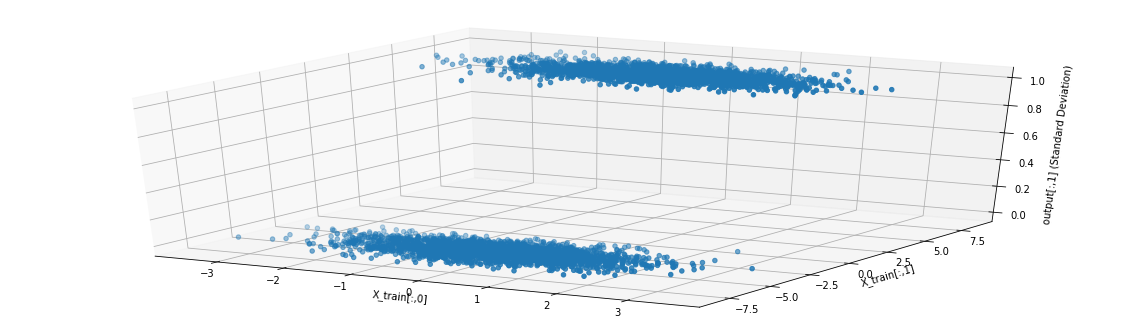

In [28]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

print(y_train)
print(X_train)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')


fig.show?

Toy dataset for classification

In [6]:
dataset_size = 5000

X_train = np.empty(shape=(dataset_size, 2), dtype=float)
y_train = np.empty(shape=(dataset_size,), dtype=float)

# make first dimension 0 to effectively make it univariate 
# bc current bnn arch only works with multivariate input
X_train[:int(dataset_size/2),0] = np.random.normal(loc=0,
                                                   scale=1,
                                                   size=(int(dataset_size/2),))
X_train[:int(dataset_size/2), 1] = np.random.normal(loc=-5, 
                                                    scale=1, 
                                                    size=(int(dataset_size/2),))
y_train[:int(dataset_size/2)] = 0

X_train[int(dataset_size/2):,0] = np.random.normal(loc=0,
                                                   scale=1,
                                                   size=(int(dataset_size/2),))
X_train[int(dataset_size/2):, 1] = np.random.normal(loc=5,
                                                    scale=1,
                                                    size=(int(dataset_size/2),))
y_train[int(dataset_size/2):] = 1

# shuffle order
perm = np.random.permutation(dataset_size)
X_train = X_train[perm]
y_train = y_train[perm]

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

C:\Users\emers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

(-10, 10)

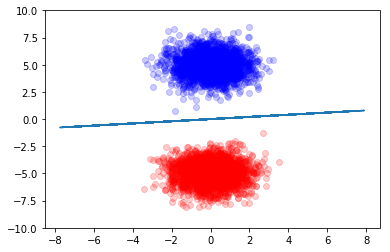

In [8]:
x1 = np.random.uniform(-8, 8, 100)
x2 = .1 * x1

plt.plot(x1, x2)
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', alpha=0.2)
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='blue', alpha=0.2)
plt.ylim((-10, 10))

In [9]:
W

array([[-10],
       [ 10]])

In [10]:
a = np.array([[1,2]]).T
b = np.array([[3,4]]).T
np.hstack((a,b))
# a.shape

array([[1, 3],
       [2, 4]])

## clearly predict function works

acc of BNN with q mean == true weights:  0.6864


mean log prior  -84.605478515625
mean log post est  -8.436058349609375
mean likelihood est  -inf
Accuracy with 0.1 as slope:  1.0


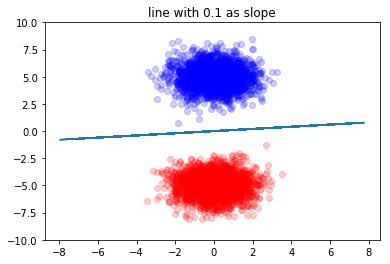

Accuracy with 0.5 as slope:  1.0


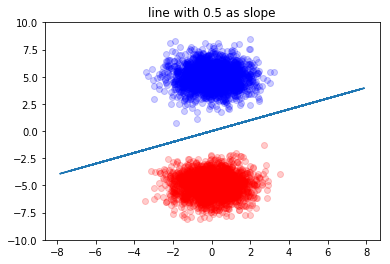

Accuracy with 1.0 as slope:  0.9994


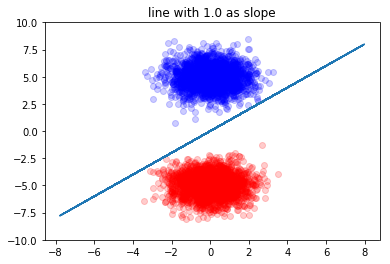

Accuracy with 3.0 as slope:  0.9402


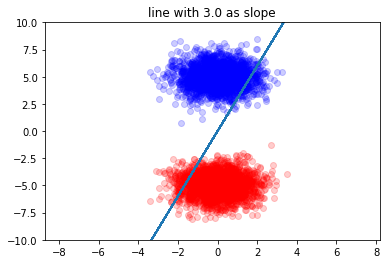

Accuracy with 10.0 as slope:  0.7034


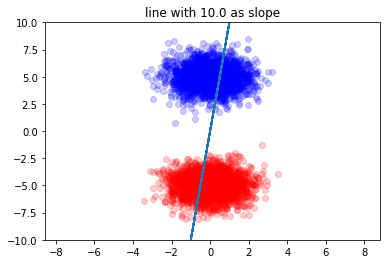

Accuracy with 100 as slope:  0.5198


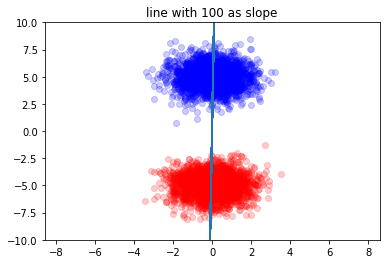

In [11]:

# Maybe we want to plot epoch by mean and std weight values for linear regression model 
# as well as the true weights used to create the toy dataset?

# Seems like a good diagnostic plot which we could include in our report

# for regression toy set
# W_full = np.hstack((W, W_s))
# W_full

# b_full = np.hstack((b, b_s))
# b_full[1] = 2.0

# for classificaiton toy set
w1 = np.array([[10,1]]).T
w2 = np.array([[0,0]]).T
W_full = np.hstack((w1, w2))



b_full = np.array([0])
# b_full[0], b_full[1] = 0,0
bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy() 

# W_full
# W
# preset_preds.shape
# print('MAE of BNN with q mean == true weights: ', np.mean(np.abs(preset_preds - y_train.flatten())))
print('acc of BNN with q mean == true weights: ', np.mean((preset_preds == y_train.flatten()).astype(int)))
print('\n')
# print(preset_preds[1], y_train[1])
# bnn_preset.model.l1.W_log_s_DO
# bnn_preset.model.l1.b_log_s_O
bnn_preset.MC_elbo(torch.Tensor(X_train), torch.Tensor(y_train), 9, 10, 100).detach().numpy()


accuracies = []
weights = [0.1, 0.5, 1.0, 3.0, 10.0, 100]
for w in weights:
    W_full[0][0] = w
    bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
    preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy()
    print('Accuracy with {} as slope: '.format(w), np.mean((preset_preds == y_train.flatten()).astype(int)))
    
    
    x1 = np.random.uniform(-8, 8, 100)
    x2 = w * x1

    plt.title("line with {} as slope".format(w))
    plt.plot(x1, x2)
    plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', alpha=0.2)
    plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='blue', alpha=0.2)
    plt.ylim((-10, 10))
    plt.show()

## test ELBO as slope of line changes

ELBO components with 0.1 as slope: 

mean log prior  -6.301790771484375
mean log post est  -8.290055541992187
mean likelihood est  -57.9078369140625
Accuracy with 0.1 as slope:  100.0 %


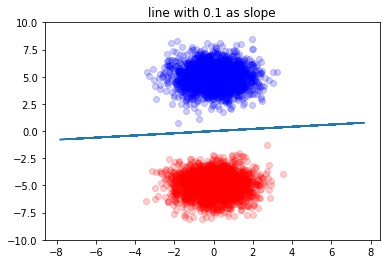

ELBO components with 0.5 as slope: 

mean log prior  -6.312845458984375
mean log post est  -8.607342529296876
mean likelihood est  -56.52978515625
Accuracy with 0.5 as slope:  100.0 %


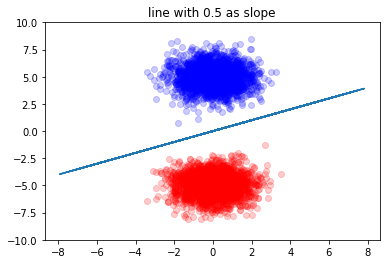

ELBO components with 1.0 as slope: 

mean log prior  -7.089805908203125
mean log post est  -8.582881469726562
mean likelihood est  -93.916953125
Accuracy with 1.0 as slope:  99.94 %


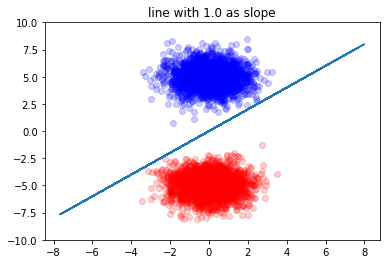

ELBO components with 3.0 as slope: 

mean log prior  -13.335157470703125
mean log post est  -8.515051879882812
mean likelihood est  -707.119375
Accuracy with 3.0 as slope:  96.06 %


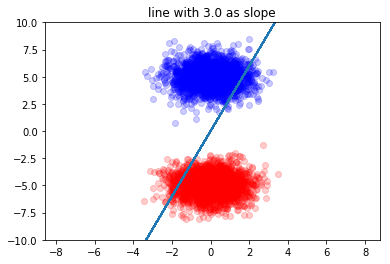

ELBO components with 5.0 as slope: 

mean log prior  -25.877333984375
mean log post est  -8.476388549804687
mean likelihood est  -2558.4109375
Accuracy with 5.0 as slope:  84.08 %


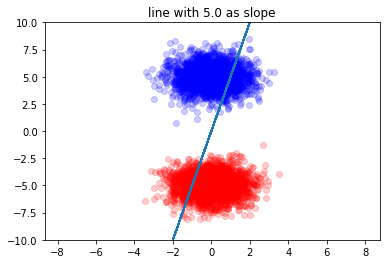

ELBO components with 5.5 as slope: 

mean log prior  -25.8384033203125
mean log post est  -8.46451171875
mean likelihood est  -2549.78375
Accuracy with 5.5 as slope:  85.5 %


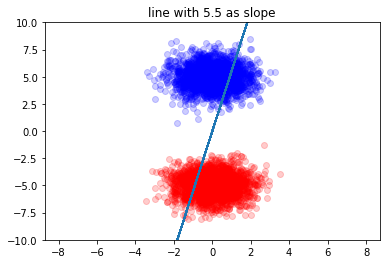

ELBO components with 6.0 as slope: 

mean log prior  -34.4697509765625
mean log post est  -8.504229736328124
mean likelihood est  -inf
Accuracy with 6.0 as slope:  81.08 %


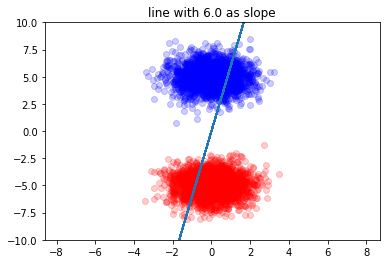

ELBO components with 7.0 as slope: 

mean log prior  -44.6575634765625
mean log post est  -8.444856567382812
mean likelihood est  -inf
Accuracy with 7.0 as slope:  75.8 %


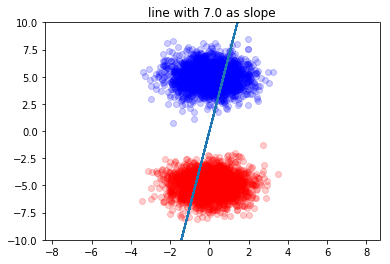

ELBO components with 10.0 as slope: 

mean log prior  -84.556767578125
mean log post est  -8.461643676757813
mean likelihood est  -inf
Accuracy with 10.0 as slope:  69.92 %


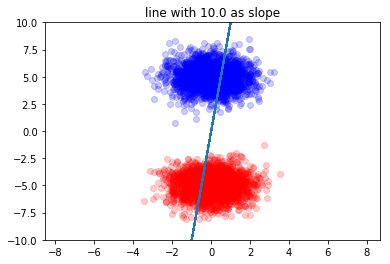

In [15]:
w1 = np.array([[10,1]]).T
w2 = np.array([[0,0]]).T
W_full = np.hstack((w1, w2))



b_full = np.array([0])
# b_full[0], b_full[1] = 0,0
bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy() 

# W_full
# W
# preset_preds.shape
# print('MAE of BNN with q mean == true weights: ', np.mean(np.abs(preset_preds - y_train.flatten())))
# print('acc of BNN with q mean == true weights: ', np.mean((preset_preds == y_train.flatten()).astype(int)))
# print('\n')
# print(preset_preds[1], y_train[1])
# bnn_preset.model.l1.W_log_s_DO
# bnn_preset.model.l1.b_log_s_O
# bnn_preset.MC_elbo(torch.Tensor(X_train), torch.Tensor(y_train), 9, 10, 100).detach().numpy()

X_train1 = X_train
y_train1 = y_train

accuracies = []
weights = [0.1, 0.5, 1.0, 3.0, 5.0, 5.5, 6.0, 7.0, 10.0]
for w in weights:
    W_full[0][0] = w
    bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
    preset_preds = bnn_preset.model.forward(torch.Tensor(X_train1), predict=True).detach().numpy()
    print('ELBO components with {} as slope: \n'.format(w))
    bnn_preset.MC_elbo(torch.Tensor(X_train1), torch.Tensor(y_train1), 9, 10, 100).detach().numpy()
    print('Accuracy with {} as slope: '.format(w), np.mean((preset_preds == y_train1.flatten()).astype(int)) * 100, '%')
    
    x1 = np.random.uniform(-8, 8, 100)
    x2 = w * x1

    plt.title("line with {} as slope".format(w))
    plt.plot(x1, x2)
    plt.scatter(X_train1[y_train1 == 0,0], X_train1[y_train1 == 0,1], c='red', alpha=0.2)
    plt.scatter(X_train1[y_train1 == 1,0], X_train1[y_train1 == 1,1], c='blue', alpha=0.2)
    plt.ylim((-10, 10))
    plt.show()

In [196]:
np.exp(0)

# OK so I feel like this is a numerical stability thing but at the same time not sure how 
# meaningful these results are bc the weights weren't trained to calebrate probs with sigmoid...

1.0

mean log prior  -7.356841023763021
mean log post est  -8.37455800374349
mean likelihood est  -176.76324869791668
grads  tensor([[-0.2739, -0.1542],
        [-0.2682,  0.1469]]) 

change in w1:  [0.00384072 0.0016042 ] 
cur w1:  [0.02412207 0.01056153] 
old w1:  [0.02028134 0.00895732]
change in w2:  [ 0.00173314 -0.0012377 ] 
cur w2:  [-0.02037766  0.01207152] 
old w2:  [-0.0221108   0.01330922]
change in b:  [ 0.00207526 -0.00115365] 
cur b:  [-0.05285446 -0.04585182] 
old b:  [-0.05492971 -0.04469816]
full weights: 
 [[ 0.02412207 -0.02037766]
 [ 0.01056153  0.01207152]]
(2, 1)


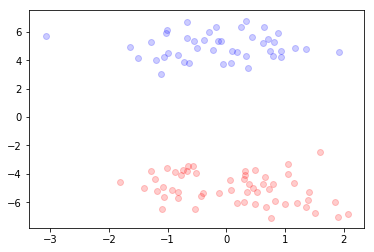

------
(100,)
(100,)
(100, 1)
------


C:\Users\emers\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


W_DO tensor([[ 0.9665, -0.3839],
        [-0.5895, -0.2048]], grad_fn=<AddBackward0>)
W_DO tensor([[ 0.9925, -0.5906],
        [ 0.4385, -0.4014]], grad_fn=<AddBackward0>)
differences between samples: 0.0274
standard deviation: tensor([[0.7957, 0.6412],
        [0.5908, 0.6208]], grad_fn=<ExpBackward>)
bias std:           tensor([0.5030, 0.6117], grad_fn=<ExpBackward>)
real:  [0. 0. 1. 0. 0. 0. 0.]
Epoch:  0 	Loss:  inf 	acc:  0.0054 

mean log prior  -6.398319498697917
mean log post est  -8.167478434244792
mean likelihood est  -95.0369140625
grads  tensor([[ 0.2165, -0.0831],
        [ 0.0146,  0.1239]]) 

change in w1:  [0.0015687  0.00032683] 
cur w1:  [-0.00691339 -0.00267838] 
old w1:  [-0.00848208 -0.00300521]
change in w2:  [ 0.0015386  -0.00170729] 
cur w2:  [-0.00292867  0.0127683 ] 
old w2:  [-0.00446727  0.01447558]
change in b:  [0.00036442 0.00042868] 
cur b:  [0.00121662 0.01391825] 
old b:  [0.0008522  0.01348957]
full weights: 
 [[-0.00691339 -0.00292867]
 [-0.00267838 

AttributeError: 'NoneType' object has no attribute 'sqrt'

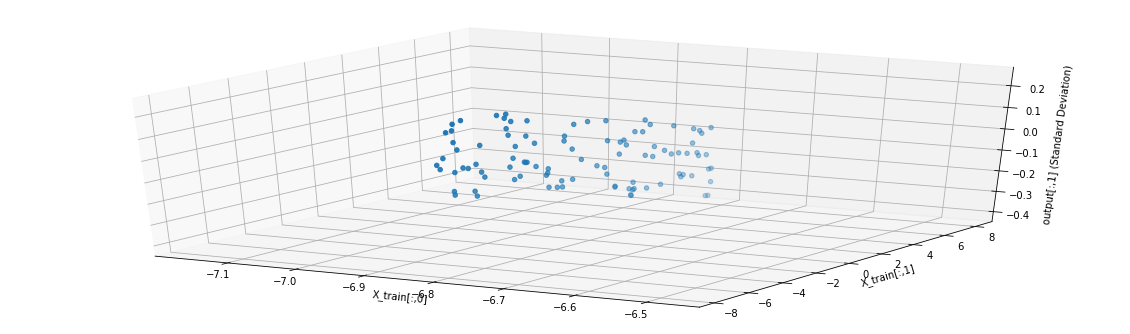

In [44]:
# bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, num_MC_samples=30, linear_regression=True, preset=False, classification=False)


bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, num_MC_samples=30, linear_regression=True, preset=False, classification=True)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=1.2e-2, batch_size=100)

In [ ]:
bnn.likelihood_est(torch.tensor(y_train), torch.tensor(y_train), 0.1)

In [25]:
np

-0.6931471805599453

In [66]:
a = torch.normal(torch.tensor([0.0]*5), torch.tensor([5.0]*5))
print(a)

sig = nn.Sigmoid()
sig(a) > 0.5

bnn.likelihood_est(torch.tensor([0.0]*5), a, 0.1)

tensor([-5.4249, -3.5355, -6.5829, -0.8022, -2.1740])


tensor(-0.5219)

mean log prior  -5.957081909179688
mean log post est  -8.4749365234375
mean likelihood est  -6174.699375
grads  tensor([[ 8.9734e+01, -5.7065e-02],
        [-1.1067e+04, -4.2979e-02]]) 

change in w1:  [-0.00271498 -0.00025465] 
cur w1:  [-0.00468861  0.0894016 ] 
old w1:  [-0.00197363  0.08965626]
change in w2:  [0.00655466 0.00397621] 
cur w2:  [ 0.00606785 -0.01825306] 
old w2:  [-0.00048681 -0.02222927]
change in b:  [0.00011519 0.00080426] 
cur b:  [ 0.43725938 -0.0231235 ] 
old b:  [ 0.4371442  -0.02392776]
full weights: 
 [[-0.00468861  0.00606785]
 [ 0.0894016  -0.01825306]]


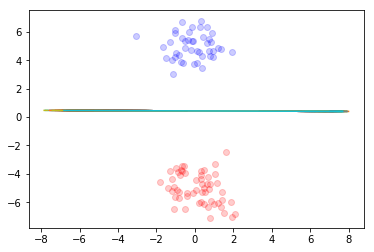

differences between samples: 0.0


TypeError: rsub() received an invalid combination of arguments - got (Tensor, numpy.ndarray), but expected one of:
 * (Tensor input, Tensor other, Number alpha)
 * (Tensor input, Number other, Number alpha)


In [19]:


# Hyperparameters that work: prior_s 0.8
# Fix likelihood mean at 1?
bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, linear_regression=True, preset=False)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=5e-2, batch_size=100)

In [0]:
for _ in range(10):
    pred1 = X_train @ W + b 
    pred2 = X_train @ W + b + np.random.normal(loc=0, scale=np.exp(X_train @ W_s + b_s))
    mae1 = np.mean(np.abs(pred1 - y_train))
    mae2 = np.mean(np.abs(pred2 - y_train))
    print("MAE 1: ", mae1, "MAE 2:", mae2)

MAE 1:  3.0056122393554254 MAE 2: 4.229932547897288
MAE 1:  3.0056122393554254 MAE 2: 4.163598483397882
MAE 1:  3.0056122393554254 MAE 2: 4.064748158286918
MAE 1:  3.0056122393554254 MAE 2: 4.157970359536937
MAE 1:  3.0056122393554254 MAE 2: 4.18713532994711
MAE 1:  3.0056122393554254 MAE 2: 4.068806773370651
MAE 1:  3.0056122393554254 MAE 2: 4.10697160790373
MAE 1:  3.0056122393554254 MAE 2: 4.275199441081447
MAE 1:  3.0056122393554254 MAE 2: 4.105935688264671
MAE 1:  3.0056122393554254 MAE 2: 4.140327650161342


tensor([ 73.2484, -10.4592,  80.1985,  36.0612,  85.2357],
       grad_fn=<SelectBackward>)
tensor([52.9553,  7.0205, 62.6282,  ...,  5.3123,  3.1554, 38.7316],
       grad_fn=<ExpBackward>)
[[ 0.          7.83732011]
 [ 0.         -0.55350876]
 [ 0.          8.53399163]
 ...
 [ 0.         -1.71126102]
 [ 0.         -3.87444431]
 [ 0.          6.53840831]]


Text(0, 0.5, 'output[:,1] (Standard Deviation)')

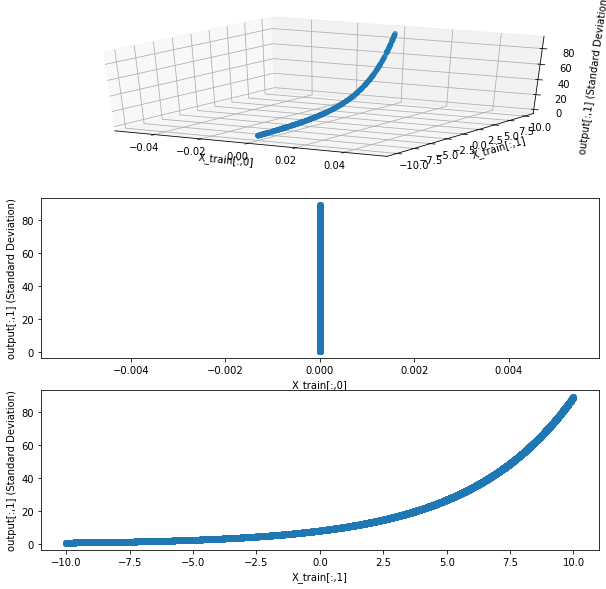

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

final_pred = bnn.model.forward(torch.Tensor(X_train))
print(final_pred[:5,0])


pred_std = torch.exp(final_pred[:,1])

print(pred_std)
print(X_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:sparse_cap,0], X_train[:sparse_cap,1], pred_std[:sparse_cap].detach().numpy())
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')



# 2D Plot:
ax_2d_x = fig.add_subplot(312)
ax_2d_x.scatter(X_train[:,0], pred_std.detach().numpy())
ax_2d_x.set_xlabel('X_train[:,0]')
ax_2d_x.set_ylabel('output[:,1] (Standard Deviation)')


ax_2d_y = fig.add_subplot(313)
ax_2d_y.scatter(X_train[:,1], pred_std.detach().numpy())
ax_2d_y.set_xlabel('X_train[:,1]')
ax_2d_y.set_ylabel('output[:,1] (Standard Deviation)')



[ 0.7019849  0.8952522  1.1417292  1.4560653  1.8569429  2.3681886
  3.020188   3.8516934  4.9121256  6.2645106  7.9892287 10.18879
 12.993922  16.571356  21.13371   26.95215   34.372505  43.8358
 55.904476  71.295845  90.9247   ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


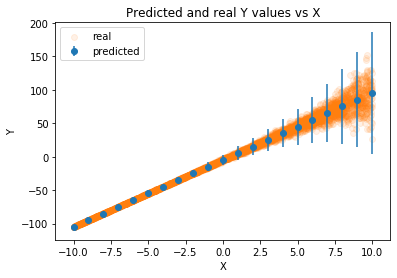

[array([0.05502322]), array([0.07427358]), array([0.10025884]), array([0.13533528]), array([0.18268352]), array([0.24659696]), array([0.33287108]), array([0.44932896]), array([0.60653066]), array([0.81873075]), array([1.10517092]), array([1.4918247]), array([2.01375271]), array([2.71828183]), array([3.66929667]), array([4.95303242]), array([6.68589444]), array([9.0250135]), array([12.18249396]), array([16.44464677]), array([22.19795128])]


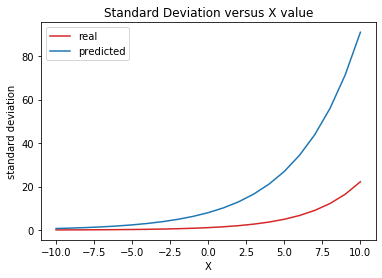

In [0]:
np.zeros(40)
X_sample = np.vstack([np.zeros(21), np.array(list(range(-10,11)))]).T
X_sample = torch.tensor(np.array(X_sample), dtype=torch.float32)


predictions = bnn.model.forward(torch.Tensor(X_train))

sample_pred = bnn.model.forward(X_sample)

y_pred = sample_pred[:,0].detach().numpy()
std_pred = torch.exp(sample_pred[:,1]).detach().numpy()
log_s_pred = sample_pred[:,1].detach().numpy()

print(std_pred)

# Sample variance to add to the y predictions
std_array = []
for scale in std_pred:
  std_array.append(np.random.normal(loc=0, scale=np.exp(scale)))
std_array = np.array((std_array))



"""
plt.scatter(X_train[:,0], y_pred + std_array, alpha=.1, label='predicted')
plt.scatter(X_train[:,0], y_train, alpha=.1, label='real')
plt.title("Y hat and Y values across X1")
plt.legend()
plt.savefig("x1_y.png")
"""


plt.show()

# For constant std dev#
#std_pred = 10 * torch.ones([y_pred.shape[0]], dtype=torch.float64)
# For constant std dev#

#plt.scatter(X_train[:,1], y_pred + std_array, alpha=.1, label='predicted')
#plt.scatter(X_sample[:,1], y_pred, alpha=.1, label='predicted')
plt.errorbar(X_sample[:,1], y_pred, yerr=(std_pred), fmt='o', label='predicted')
plt.scatter(X_train[:,1], y_train, alpha=.1, c='C1', label='real')
plt.ylabel("Y")
plt.xlabel("X")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.title("Predicted and real Y values vs X")
plt.legend()
plt.savefig("x_y1.png")
plt.show()



#stds = []
#Xs = list(range(-10, 11))
#for x in Xs:
#    stds.append(x + b_s)

#std_pred = predictions[:,1].detach().numpy()

real_std = []
for x in range(-10, 11):
    real_std.append(np.exp(np.array([0, x] @ W_s + b_s)))
print(real_std)
# plt.plot(list(range(-10,11)), list(range(0, 21)), c='C3', label='real')
plt.plot(list(range(-10,11)), real_std, c='C3', label='real')
plt.plot(X_sample[:,1], (std_pred), label='predicted')
plt.title("Standard Deviation versus X value")
plt.ylabel("standard deviation")
plt.xlabel("X")
plt.legend()
plt.savefig("std1.png")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.show()

In [0]:
print(torch.exp(bnn.model.l1.W_log_s_DO))

tensor([[0.1449, 0.1307, 0.1374, 0.1398, 0.1270],
        [0.5950, 0.5896, 0.5357, 0.6016, 0.5273]], grad_fn=<ExpBackward>)


In [0]:

plt.plot([i for i in range(100)], loss_by_epoch)

NameError: ignored

In [114]:
a = torch.tensor([3,3,3])
b = torch.tensor([5,5,3])
a == b

tensor([0, 0, 1], dtype=torch.uint8)